In [1]:
import os
import cPickle as pickle
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split

import sys
sys.path.append('../')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
from src.TTRegression import TTRegression
import urllib

In [2]:
train_fraction = 0.8

In [3]:
def get_dummies(d, col):
    dd = pd.get_dummies(d.ix[:, col])
    dd.columns = [str(col) + "_%s" % c for c in dd.columns]
    return(dd)

In [4]:
# Reproducability.
np.random.seed(0)

dataset_path = 'car.data'
if (not os.path.isfile(dataset_path)):
    dataset_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
    print('Downloading data from %s' % dataset_url)
    urllib.urlretrieve(dataset_url, dataset_path)

print('... loading data')
car_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target']
car_data = pd.read_csv(dataset_path, names=car_names, header=None)

print "dataset len: %d\n" % len(car_data)
print "Original targets:"
print car_data.target.value_counts()

# Make binary classification problem.
car_target = car_data['target']
car_target_binarized = (car_target.values != 'unacc') * 1

car_features = car_data.ix[:, :6]
car_features_one_hot = pd.concat([get_dummies(car_features, col) for col in list(car_features.columns.values)], axis = 1)
car_features_one_hot = car_features_one_hot.as_matrix()

# Shuffle.
idx_perm = np.random.permutation(len(car_data))
 
X, y = car_features_one_hot[idx_perm, :], car_target_binarized[idx_perm]

num_objects = y.size
train_size = np.round(num_objects * train_fraction).astype(int)
X_train = X[:train_size, :]
y_train = y[:train_size]
X_val = X[train_size:, :]
y_val = y[train_size:]

... loading data
dataset len: 1728

Original targets:
unacc    1210
acc       384
good       69
vgood      65
Name: target, dtype: int64


In [5]:
print(X_train.shape)
print(X_val.shape)

(1382, 21)
(346, 21)


# Train

In [29]:
model = TTRegression('all-subsets', 'logistic', 4, learning_rate=0.02, solver='sgd', max_iter=1000, verbose=1,
                                     batch_size=500, fit_intercept=False, reg=0.)
model.fit_log_val(X_train, y_train, X_val, y_val)

TTRegression(batch_size=500, coef0=None, dropout=None, exp_reg=1.0,
       fit_intercept=False, intercept0=None, learning_rate=0.02,
       loss_name='logistic', max_iter=1000, persuit_init=False, rank=4,
       reg=0.0, solver='sgd', tt_model='all-subsets', verbose=1)

In [30]:
riemannian_model = TTRegression('all-subsets', 'logistic', 4, learning_rate=10.0, solver='riemannian-sgd', max_iter=10, verbose=1,
                                     batch_size=100, fit_intercept=False, reg=0.)
riemannian_model.fit_log_val(X_train, y_train, X_val, y_val)

TTRegression(batch_size=100, coef0=None, dropout=None, exp_reg=1.0,
       fit_intercept=False, intercept0=None, learning_rate=10.0,
       loss_name='logistic', max_iter=10, persuit_init=False, rank=4,
       reg=0.0, solver='riemannian-sgd', tt_model='all-subsets', verbose=1)

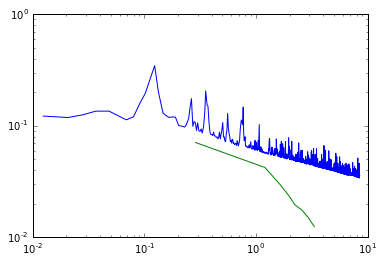

In [31]:
plt.loglog(model.logger.time_hist, model.logger.loss_hist['train']['logistic'])
plt.loglog(riemannian_model.logger.time_hist, riemannian_model.logger.loss_hist['train']['logistic'])

In [55]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 20.0, 'riemannian-sgd', max_iter=500, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)

TTRegression(batch_size=500, coef0=None, dropout=None, exp_reg=1.0,
       fit_intercept=False, intercept0=None, learning_rate=20.0,
       loss_name='logistic', max_iter=500, persuit_init=False, rank=4,
       reg=0.0, solver='riemannian-sgd', tt_model='all-subsets', verbose=1)

In [56]:
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.00063908543695358633

In [57]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 15.0, 'riemannian-sgd', max_iter=500, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)

TTRegression(batch_size=500, coef0=None, dropout=None, exp_reg=1.0,
       fit_intercept=False, intercept0=None, learning_rate=15.0,
       loss_name='logistic', max_iter=500, persuit_init=False, rank=4,
       reg=0.0, solver='riemannian-sgd', tt_model='all-subsets', verbose=1)

In [58]:
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.00073882598971240949

In [65]:

# To use the same order of looping through objects for all runs.
model = TTRegression('all-subsets', 'logistic', 4, 0.01, 'sgd', max_iter=2000, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
model.fit_log_val(X_train, y_train, X_val, y_val)
model.logger.loss_hist['train']['logistic'][-1]

0.04035071571636744

In [66]:

# To use the same order of looping through objects for all runs.
model = TTRegression('all-subsets', 'logistic', 4, 0.02, 'sgd', max_iter=2000, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
model.fit_log_val(X_train, y_train, X_val, y_val)
model.logger.loss_hist['train']['logistic'][-1]

0.015016370048456682

In [67]:

# To use the same order of looping through objects for all runs.
model = TTRegression('all-subsets', 'logistic', 4, 0.005, 'sgd', max_iter=2000, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
model.fit_log_val(X_train, y_train, X_val, y_val)
model.logger.loss_hist['train']['logistic'][-1]

0.042096606195346518

In [68]:

# To use the same order of looping through objects for all runs.
model = TTRegression('all-subsets', 'logistic', 4, 0.04, 'sgd', max_iter=2000, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
model.fit_log_val(X_train, y_train, X_val, y_val)
model.logger.loss_hist['train']['logistic'][-1]

0.0092916749943583333

In [69]:

# To use the same order of looping through objects for all runs.
model = TTRegression('all-subsets', 'logistic', 4, 0.002, 'sgd', max_iter=2000, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
model.fit_log_val(X_train, y_train, X_val, y_val)
model.logger.loss_hist['train']['logistic'][-1]

0.050642381236658915

In [71]:

# To use the same order of looping through objects for all runs.
model = TTRegression('all-subsets', 'logistic', 4, 0.06, 'sgd', max_iter=2000, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
model.fit_log_val(X_train, y_train, X_val, y_val)
model.logger.loss_hist['train']['logistic'][-1]

0.16415022748865921

In [72]:

# To use the same order of looping through objects for all runs.
model = TTRegression('all-subsets', 'logistic', 4, 0.08, 'sgd', max_iter=2000, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
model.fit_log_val(X_train, y_train, X_val, y_val)
model.logger.loss_hist['train']['logistic'][-1]

0.15824865133758087

In [60]:
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.00044281225364734608

In [61]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 40.0, 'riemannian-sgd', max_iter=500, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.00014638632522643175

In [62]:

# To use the same order of looping through objects for all runs.
rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 60.0, 'riemannian-sgd', max_iter=500, verbose=1,
                                 batch_size=500, fit_intercept=False, reg=0.)
rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
rieamannian_model.logger.loss_hist['train']['logistic'][-1]

0.00016332973482077837

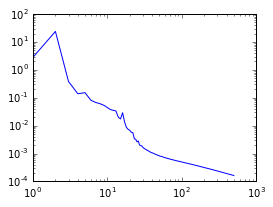

In [64]:
plt.loglog(rieamannian_model.logger.loss_hist['train']['logistic'])

In [74]:
plain_sgd = {}
riemannian_sgd = {}

for batch_size in [-1, 100, 500]:
#     To use the same order of looping through objects for all runs.
    np.random.seed(0)
    model = TTRegression('all-subsets', 'logistic', 4, 0.03, 'sgd', max_iter=12000, verbose=1,
                         fit_intercept=False, batch_size=batch_size, reg=0.)
    model.fit_log_val(X_train, y_train, X_val, y_val)
    plain_sgd[batch_size] = model

    # To use the same order of looping through objects for all runs.
    np.random.seed(0)
    rieamannian_model = TTRegression('all-subsets', 'logistic', 4, 40.0, 'riemannian-sgd', max_iter=1000, verbose=1,
                                     batch_size=batch_size, fit_intercept=False, reg=0.)
    rieamannian_model.fit_log_val(X_train, y_train, X_val, y_val)
    riemannian_sgd[batch_size] = rieamannian_model

## Train from random init

In [98]:
import tt
np.random.seed(0)
w_init = tt.rand(2 * np.ones(X.shape[1]), r=4)
# Divide by norm to make sure the norm is reasonable,
# round to make all the ranks are valid.
w_init = ((1 / w_init.norm()) * w_init).round(eps=0)

plain_sgd_rand = {}
riemannian_sgd_rand = {}

batch_size = -1
# # To use the same order of looping through objects for all runs.
# np.random.seed(0)
# model_rand = TTRegression('all-subsets', 'logistic', 4, 'sgd', max_iter=5000, verbose=1,
#                      fit_intercept=False, batch_size=batch_size, reg=0., coef0=w_init)
# model_rand.fit_log_val(X_train, y_train, X_val, y_val)
# plain_sgd_rand[batch_size] = model_rand

np.random.seed(0)
# To use the same order of looping through objects for all runs.
riemannian_model_rand = TTRegression('all-subsets', 'logistic', 4, 40.0, 'riemannian-sgd', max_iter=1200, verbose=1,
                                 batch_size=batch_size, fit_intercept=False, reg=0., coef0=w_init)
riemannian_model_rand.fit_log_val(X_train, y_train, X_val, y_val)
riemannian_sgd_rand[batch_size] = riemannian_model_rand


# # Beter init distribution
# from src.models.all_subsets import tensorize_linear_init
# w_init = tensorize_linear_init(np.random.rand(X.shape[1]), np.random.rand())
# for _ in range(2):
#     w_init = w_init + 0 * tt.ones(2, X.shape[1])
# w_init.core += 0.01 * np.random.randn(*w_init.core.shape)
# w_init = w_init.round(eps=0)

# plain_sgd_smart_rand = {}
# riemannian_sgd_smart_rand = {}

# batch_size = -1
# # To use the same order of looping through objects for all runs.
# np.random.seed(0)
# model_rand = TTRegression('all-subsets', 'logistic', 4, 'sgd', max_iter=5000, verbose=1,
#                      fit_intercept=False, batch_size=batch_size, reg=0., coef0=w_init)
# model_rand.fit_log_val(X_train, y_train, X_val, y_val)
# plain_sgd_smart_rand[batch_size] = model_rand

# np.random.seed(0)
# # To use the same order of looping through objects for all runs.
# riemannian_model_rand = TTRegression('all-subsets', 'logistic', 4, 'riemannian-sgd', max_iter=1600, verbose=1,
#                                  batch_size=batch_size, fit_intercept=False, reg=0., coef0=w_init)
# riemannian_model_rand.fit_log_val(X_train, y_train, X_val, y_val)
# riemannian_sgd_smart_rand[batch_size] = riemannian_model_rand

# Save

In [101]:
with open('data/riemannian_vs_baseline_car_40_003.pickle', 'wb') as f:
    obj = {'plain_sgd': plain_sgd, 'riemannian_sgd': riemannian_sgd,
           'plain_sgd_rand': plain_sgd_rand, 'riemannian_sgd_rand': riemannian_sgd_rand,
           'X_train': X_train, 'y_train': y_train, 'X_val': X_val, 'y_val': y_val}
    pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)

# Plot train

In [48]:
params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4, 3]
   }
mpl.rcParams.update(params)


colors = [(31, 119, 180), (44, 160, 44), (255, 127, 14), (255, 187, 120)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(colors)):
    r, g, b = colors[i]
    colors[i] = (r / 255., g / 255., b / 255.)

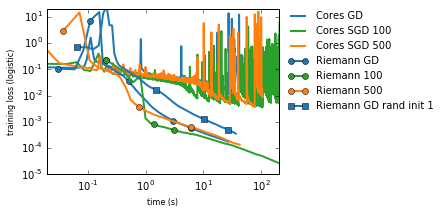

In [107]:
with open('data/riemannian_vs_baseline_car_40_003.pickle', 'rb') as f:
    logs = pickle.load(f)

fig = plt.figure()
plt.loglog(logs['plain_sgd'][-1].logger.time_hist,
           logs['plain_sgd'][-1].logger.loss_hist['train']['logistic'], label='Cores GD',
           linewidth=2, color=colors[0])
plt.loglog(logs['plain_sgd'][100].logger.time_hist, logs['plain_sgd'][100].logger.loss_hist['train']['logistic'],
           label='Cores SGD 100', linewidth=2, color=colors[1])
plt.loglog(logs['plain_sgd'][500].logger.time_hist, logs['plain_sgd'][500].logger.loss_hist['train']['logistic'],
           label='Cores SGD 500', linewidth=2, color=colors[2])

grid = np.array([0.01, 1, 5, 30, 60]) / 10
x = logs['riemannian_sgd'][-1].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd'][-1].logger.time_hist,
           logs['riemannian_sgd'][-1].logger.loss_hist['train']['logistic'],
           marker='o', markevery=marker_indices, label='Riemann GD', linewidth=2, color=colors[0])
grid = np.array([0.05, 2, 12, 30]) / 10
x = logs['riemannian_sgd'][100].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd'][100].logger.time_hist,
           logs['riemannian_sgd'][100].logger.loss_hist['train']['logistic'],
           marker='o', markevery=marker_indices, label='Riemann 100', linewidth=2, color=colors[1])
grid = np.array([0.1, 7.5, 60]) / 10
x = logs['riemannian_sgd'][500].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd'][500].logger.time_hist,
           logs['riemannian_sgd'][500].logger.loss_hist['train']['logistic'],
           marker='o', markevery=marker_indices, label='Riemann 500', linewidth=2, color=colors[2])

grid = np.array([0.1, 3, 20, 53]) / 2
x = logs['riemannian_sgd_rand'][-1].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd_rand'][-1].logger.time_hist,
           logs['riemannian_sgd_rand'][-1].logger.loss_hist['train']['logistic'],
           marker='s', markevery=marker_indices, label='Riemann GD rand init 1', linewidth=2, color=colors[0])

# plt.loglog(logs['plain_sgd_rand'][-1].logger.time_hist,
#            logs['plain_sgd_rand'][-1].logger.loss_hist['train']['logistic'],
#            marker='v', markevery=marker_indices, label='Cores GD rand init', linewidth=2, color=colors[0])

legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1.04), frameon=False)
plt.xlabel('time (s)')
plt.ylabel('training loss (logistic)')
plt.minorticks_off()
ax = plt.gca()
ax.set_xlim([0.02, 200])
ax.set_ylim([1e-5, 2e1])
fig.tight_layout()

In [108]:
fig.savefig('data/riemannian_vs_plain_car_train.pdf', bbox_extra_artists=(legend,), bbox_inches='tight')

# Plot validation

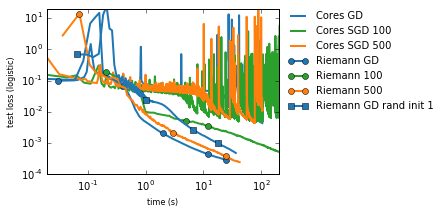

In [112]:
with open('data/riemannian_vs_baseline_car_40_003.pickle', 'rb') as f:
    logs = pickle.load(f)

fig = plt.figure()
plt.loglog(logs['plain_sgd'][-1].logger.time_hist,
           logs['plain_sgd'][-1].logger.loss_hist['valid']['logistic'], label='Cores GD',
           linewidth=2, color=colors[0])
plt.loglog(logs['plain_sgd'][100].logger.time_hist, logs['plain_sgd'][100].logger.loss_hist['valid']['logistic'],
           label='Cores SGD 100', linewidth=2, color=colors[1])
plt.loglog(logs['plain_sgd'][500].logger.time_hist, logs['plain_sgd'][500].logger.loss_hist['valid']['logistic'],
           label='Cores SGD 500', linewidth=2, color=colors[2])

grid = np.array([0.01, 1, 5, 30, 60]) / 2.5
x = logs['riemannian_sgd'][-1].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd'][-1].logger.time_hist,
           logs['riemannian_sgd'][-1].logger.loss_hist['valid']['logistic'],
           marker='o', markevery=marker_indices, label='Riemann GD', linewidth=2, color=colors[0])
grid = np.array([0.05, 2, 12, 30]) / 2.5
x = logs['riemannian_sgd'][100].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd'][100].logger.time_hist,
           logs['riemannian_sgd'][100].logger.loss_hist['valid']['logistic'],
           marker='o', markevery=marker_indices, label='Riemann 100', linewidth=2, color=colors[1])
grid = np.array([0.1, 7.5, 60]) / 2.5
x = logs['riemannian_sgd'][500].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd'][500].logger.time_hist,
           logs['riemannian_sgd'][500].logger.loss_hist['valid']['logistic'],
           marker='o', markevery=marker_indices, label='Riemann 500', linewidth=2, color=colors[2])

grid = np.array([0.1, 3, 20, 53]) / 3
x = logs['riemannian_sgd_rand'][-1].logger.time_hist
marker_indices = np.searchsorted(x, grid)
plt.loglog(logs['riemannian_sgd_rand'][-1].logger.time_hist,
           logs['riemannian_sgd_rand'][-1].logger.loss_hist['valid']['logistic'],
           marker='s', markevery=marker_indices, label='Riemann GD rand init 1', linewidth=2, color=colors[0])

# plt.loglog(logs['plain_sgd_rand'][-1].logger.time_hist,
#            logs['plain_sgd_rand'][-1].logger.loss_hist['valid']['logistic'],
#            marker='v', label='Cores GD rand init', linewidth=2, color=colors[0])

legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1.04), frameon=False)
plt.xlabel('time (s)')
plt.ylabel('test loss (logistic)')
plt.minorticks_off()
ax = plt.gca()
ax.set_xlim([0.02, 200])
ax.set_ylim([1e-4, 20])
fig.tight_layout()

In [113]:
fig.savefig('data/riemannian_vs_plain_car_validation.pdf', bbox_extra_artists=(legend,), bbox_inches='tight')